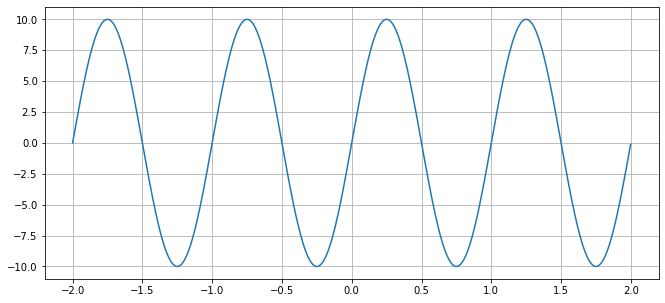

In [61]:
import numpy as np
from matplotlib import pyplot

pyplot.rcParams["figure.figsize"] = (11, 5)

# Caracterización de la señal de entrada, senoidal de prueba
amplitude = 10
frequency = 1
periods = 2

# Definición de intervalos
start_time = -periods / frequency
stop_time = periods / frequency

time = np.arange(start_time, stop_time, (stop_time - start_time) / 2**11)
values = amplitude * np.sin(2 * np.pi * frequency * time)

# Graficando dicha señal de entrada
pyplot.plot(time, values)
pyplot.grid()
pyplot.show()

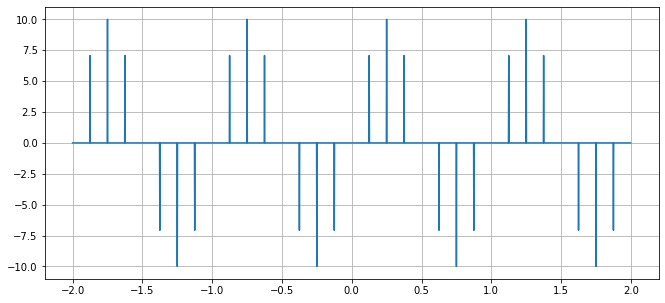

In [62]:
def delta_t(f: float, time: list) -> list:
    return [1 if abs(t * f - int(t * f)) < 1e-3 else 0 for t in time]

# Caracterizamos las condiciones de muestreo
f_sampling = frequency * 8
signal_samples = delta_t(f_sampling, time) * values

# Graficamos tal resultado
pyplot.plot(time, signal_samples)
pyplot.grid()
pyplot.show()

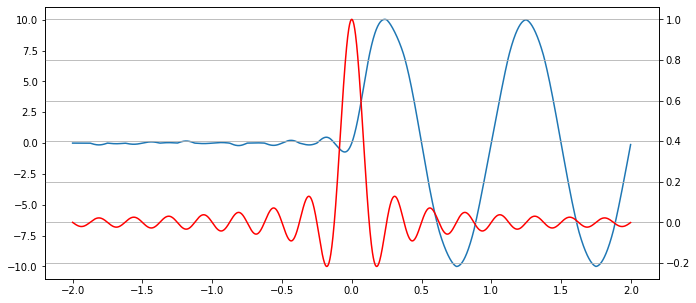

In [68]:
from scipy import signal

# Convoluciono con la antitransformada de la función
output = signal.convolve(signal_samples, [np.sinc(t * f_sampling) for t in time])

fig, ax1 = pyplot.subplots(1, 1)
ax2 = ax1.twinx()

ax2.plot(time, np.sinc(time * f_sampling), 'r')
ax1.plot(time, output[:len(output) // 2 + 1])

pyplot.grid()
pyplot.show()